# Projeto 3 - Ciência dos Dados


## Introdução

O objetivo principal desse projeto consiste em criar um modelo preditivo capaz de, com base em algumas características do perfil do aluno e no seu desempenho no primeiro dia de prova, dizer se um aluno estará presente ou não no segundo dia de prova. 

Para isso será utilizada a base de dados com os microdados do Enem 2023, que continham informações relevantes do perfil de todos os candidatos, assim como informações sobre a presença e as notas em todas as provas.

No entanto, o DataFrame foi filtrado, inicialmente, no arquivo "prepara_df" com base em fatores que seriam mais relevantes para o nosso objetivo, isto é, selecionou-se apenas os alunos que estiveram presentes no primeiro dia de prova e colunas com informações que possivelmente influenciavam na ausencia ao segundo dia de prova, além disso foi criada duas colunas "PRESENCA_PRIMEIRO_DIA" e "PRESENCA_SEGUNDO_DIA".

#### Importando bibliotecas 

In [73]:
%matplotlib inline
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

from IPython.display import display  # Para ter melhor print.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#### Lendo o DataFrame

In [3]:
# Lendo a base de dados 
df = pd.read_csv('MICRODADOS_REDUZIDO', sep=';')
df

,Unnamed: 0,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,PRESENCA_PRIMEIRO_DIA,PRESENCA_SEGUNDO_DIA
0,2,210061103945,21 anos,Feminino,Solteiro(a),Branca,Não Respondeu,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,502.0,498.9,475.6,363.2,Sem problemas,700.0,Presente,Presente
1,3,210060214087,17 anos,Feminino,Solteiro(a),Parda,Pública,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,459.0,508.5,507.2,466.7,Sem problemas,880.0,Presente,Presente
2,4,210059980948,18 anos,Feminino,Solteiro(a),Parda,Pública,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,402.5,379.2,446.9,338.3,Sem problemas,560.0,Presente,Presente
3,9,210060801601,Entre 26 e 30 anos,Masculino,Solteiro(a),Branca,Não Respondeu,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,564.7,630.3,610.4,680.2,Sem problemas,600.0,Presente,Presente
4,10,210059085130,23 anos,Masculino,Solteiro(a),Parda,Não Respondeu,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,644.9,620.2,626.9,736.3,Sem problemas,860.0,Presente,Presente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822638,3933946,210061965964,Entre 31 e 40 anos,Feminino,Solteiro(a),Branca,Não Respondeu,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,568.6,605.2,598.2,496.8,Sem problemas,500.0,Presente,Presente
2822639,3933948,210061959674,18 anos,Masculino,Solteiro(a),Branca,Pública,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,476.2,542.9,545.2,530.5,Sem problemas,600.0,Presente,Presente
2822640,3933950,210061959676,Entre 31 e 40 anos,Masculino,Solteiro(a),Branca,Não Respondeu,Não,Presente na prova,Presente na prova,Presente na prova,Presente na prova,566.2,605.6,613.7,547.3,Sem problemas,540.0,Presente,Presente
2822641,3933951,210061950911,Menor de 17 anos,Feminino,Solteiro(a),Branca,Não Respondeu,Sim,Presente na prova,Presente na prova,Presente na prova,Presente na prova,377.2,535.6,610.6,644.4,Sem problemas,640.0,Presente,Presente


### Análise Exploratória


Inicialmente será analisado o novo DataFrame completo, tanto de alunos que estiveram presentes no segundo dia de prova como de alunos que faltaram, analisando os percentuais de falta por rótulo, tentando entender se existem maiores percentuais de falta em alguns rótulos.

No caso de features quantitativas, essas serão analisadas por meio de boxplots.


#### Relação de idade e presença no segundo dia de prova

In [4]:
percent_por_idade = pd.crosstab(df.TP_FAIXA_ETARIA, df.PRESENCA_SEGUNDO_DIA, normalize='index', margins=True)
percent_por_idade

PRESENCA_SEGUNDO_DIA,Faltou,Presente
TP_FAIXA_ETARIA,,
17 anos,0.044684,0.955316
18 anos,0.043000,0.957000
19 anos,0.045300,0.954700
20 anos,0.047988,0.952012
21 anos,0.050679,0.949321
22 anos,0.053289,0.946711
23 anos,0.057803,0.942197
24 anos,0.060126,0.939874
25 anos,0.063368,0.936632


É possível observar que o percentual de falta no segundo dia de prova por faixa de idades gira está entre 4,3% e 6,6%, no entanto é possível perceber que esse percentual é mais alto entre os 22 e 70 anos, incluindo também os candidatos menores de 17 anos. Por outro lado, os menores percentuais estão nas faixas 17 à 20 anos, incluindo também a faixa acima de 70 anos.

#### Analisando por Sexo

In [5]:
percent_por_sexo = pd.crosstab(df.TP_SEXO, df.PRESENCA_SEGUNDO_DIA, normalize='index')
percent_por_sexo

PRESENCA_SEGUNDO_DIA,Faltou,Presente
TP_SEXO,,
Feminino,0.051426,0.948574
Masculino,0.048727,0.951273


Os percentuais de falta se encontram bem próximos de 5%, no entanto é possível perceber que a desistência do público feminino é levemente maior do que à dos homens

#### Analisando por Estado Civil

In [6]:
percent_por_estado_civil = pd.crosstab(df.TP_ESTADO_CIVIL, df.PRESENCA_SEGUNDO_DIA, normalize='index')
percent_por_estado_civil

PRESENCA_SEGUNDO_DIA,Faltou,Presente
TP_ESTADO_CIVIL,,
Casado(a)/Mora com companheiro(a),0.060793,0.939207
Divorciado(a)/Desquitado(a)/Separado(a),0.064345,0.935655
Não informado,0.061872,0.938128
Solteiro(a),0.049261,0.950739
Viúvo(a),0.062263,0.937737


É notório que o índice de desistência entre as pessoas dadas como Divorciadas/Desquitadas/Separadoas e Viúvoas tende a ser mais altas comparadas com os outros estados civís. O menor índice de faltas se dá pelas pessoas dadas como Solteiras, com menos de 5%.


#### Analisando por Raça

In [7]:
percent_por_raca = pd.crosstab(df.TP_COR_RACA, df.PRESENCA_SEGUNDO_DIA, normalize='index')
percent_por_raca

PRESENCA_SEGUNDO_DIA,Faltou,Presente
TP_COR_RACA,,
Amarela,0.054184,0.945816
Branca,0.045841,0.954159
Indígena,0.073962,0.926038
Não declarado,0.052009,0.947991
Parda,0.052381,0.947619
Preta,0.057955,0.942045


Pode-se observar que há uma certa discrepância entre os índices de faltas no segundo dia de prova, enquanto pessoas Brancas possuem um índice de falta próximo de 4,5%, entre as pessoas Indígenas esse índice passa de 7%, mostrando-se um fator a ser levado em consideração.

#### Analisando por Tipo de Escola

In [8]:
percent_por_escola = pd.crosstab(df.TP_ESCOLA, df.PRESENCA_SEGUNDO_DIA, normalize='index')
percent_por_escola

PRESENCA_SEGUNDO_DIA,Faltou,Presente
TP_ESCOLA,,
Não Respondeu,0.054711,0.945289
Privada,0.014837,0.985163
Pública,0.050998,0.949002


É possível notar que o tipo de escola que o aluno realizou o ensino médio é, também, um fator relevante, visto que o percentual de falta dos alunos de escola privada é próximo de 1,5% enquanto o de escola pública é aproximadamente 5% e o de alunos que não respondem a essa pergunta ultrapassa isso.

#### Analisando por ser Treineiro ou não

In [9]:
percent_por_treineiro = pd.crosstab(df.IN_TREINEIRO, df.PRESENCA_SEGUNDO_DIA, normalize='index')
percent_por_treineiro

PRESENCA_SEGUNDO_DIA,Faltou,Presente
IN_TREINEIRO,,
Não,0.046496,0.953504
Sim,0.066519,0.933481


O fato de o aluno ser treineiro ou não também apresenta influência na ausência ao segundo dia de prova, visto que alunos que são treineiros se ausentaram mais que os alunos não treineiros.

#### Analisando por Nota em Ciências Humanas

In [10]:
dados_ch = df.groupby('PRESENCA_SEGUNDO_DIA').NU_NOTA_CH.describe().round(3)
dados_ch

,count,mean,std,min,25%,50%,75%,max
PRESENCA_SEGUNDO_DIA,,,,,,,,
Faltou,142219.0,470.059,103.244,0.0,412.2,480.2,538.0,804.1
Presente,2680424.0,526.182,86.815,0.0,471.2,532.9,586.9,823.0


In [11]:
# Separando o DataFrame com base na presença no segundo dia de prova
df_faltou_dia_2 = df.loc[df['PRESENCA_SEGUNDO_DIA']=='Faltou',:]
df_presente_dia_2 = df.loc[df['PRESENCA_SEGUNDO_DIA']=='Presente',:]



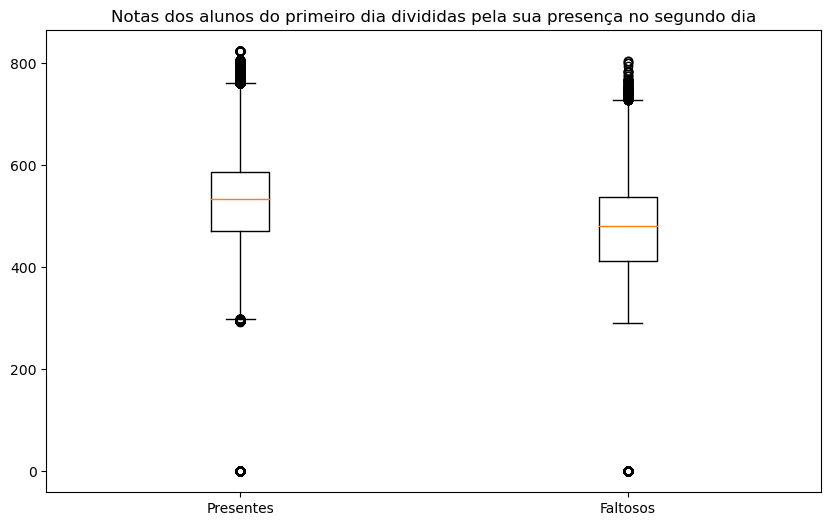

In [12]:
# Plotando o BoxPlot

plt.figure(figsize=(10,6))
plt.title('Notas dos alunos do primeiro dia divididas pela sua presença no segundo dia')
plt.boxplot([df_presente_dia_2['NU_NOTA_CH'], df_faltou_dia_2['NU_NOTA_CH']], labels=['Presentes', 'Faltosos'])
plt.show()

A média de notas em ciências humanas entre os alunos que estiveram presentes no segundo dia de prova é de 526, enquanto a dos alunos que faltaram é de 470 e ainda é importante ressaltar que o desvio padrão entre os alunos que faltaram é consideravelmente maior, ou seja, suas notas estão mais dispersas em relação à essa média. No entanto o intervalo em que elas se encontram é semelhante.

#### Analisando por Nota em Linguagens e Códigos

In [13]:
dados_lc = df.groupby('PRESENCA_SEGUNDO_DIA').NU_NOTA_LC.describe().round(3)
dados_lc

,count,mean,std,min,25%,50%,75%,max
PRESENCA_SEGUNDO_DIA,,,,,,,,
Faltou,142219.0,477.903,87.891,0.0,432.6,487.1,534.75,820.8
Presente,2680424.0,520.282,74.127,0.0,473.7,524.9,571.80,820.8


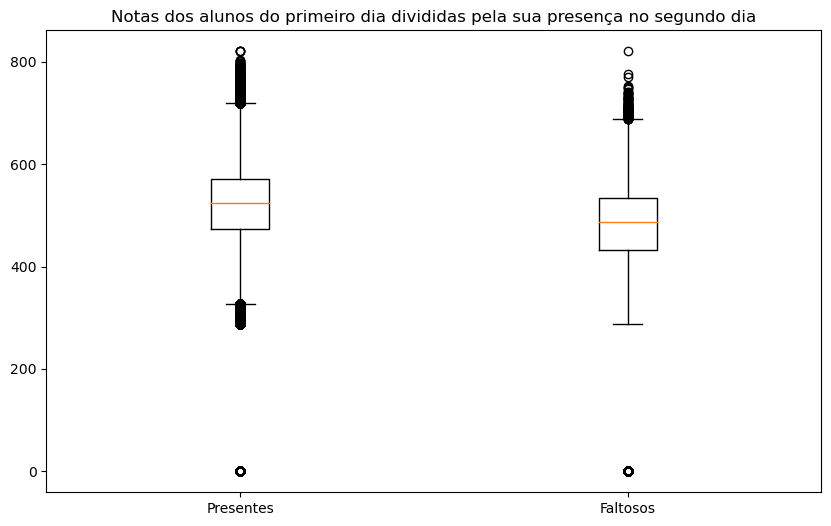

In [14]:
# Plotando o BoxPlot

plt.figure(figsize=(10,6))
plt.title('Notas dos alunos do primeiro dia divididas pela sua presença no segundo dia')
plt.boxplot([df_presente_dia_2['NU_NOTA_LC'], df_faltou_dia_2['NU_NOTA_LC']], labels=['Presentes', 'Faltosos'])
plt.show()

No caso das notas de Linguagens, a média entre os faltosos do segundo dia é 477 e do presentes é 520, contudo os seus desvios padrões estão bem próximos, ou seja, possuem uma distruibuição semelhante, diferentemente do caso das notas de Ciências Humanas.

#### Analisando pelo Tipo de Redação

In [15]:
percent_por_tp_redacao = pd.crosstab(df.TP_STATUS_REDACAO, df.PRESENCA_SEGUNDO_DIA, normalize='index')
percent_por_tp_redacao

PRESENCA_SEGUNDO_DIA,Faltou,Presente
TP_STATUS_REDACAO,,
Anulada,0.143849,0.856151
Cópia Texto Motivador,0.096245,0.903755
Em Branco,0.283974,0.716026
Fuga ao tema,0.157116,0.842884
Não atendimento ao tipo textual,0.109186,0.890814
Parte desconectada,0.145722,0.854278
Sem problemas,0.043511,0.956489
Texto insuficiente,0.212628,0.787372


A classificação da redação aparenta ser um fator decisivo na decisão do aluno de ir ou não ao segundo dia de prova. A porcentagem de faltas entre os alunos que não tiveram problemas na redação é próximo de 4,3%, bem inferior a todas as outras classificações, como "Redação em branco" que chega à possuir um índice de falta de 28%, aproximadamente.

#### Analisando pela Nota de Redação

In [16]:
dados_redacao = df.groupby('PRESENCA_SEGUNDO_DIA').NU_NOTA_REDACAO.describe().round(3)
dados_redacao

,count,mean,std,min,25%,50%,75%,max
PRESENCA_SEGUNDO_DIA,,,,,,,,
Faltou,142219.0,453.136,248.983,0.0,340.0,500.0,600.0,1000.0
Presente,2680424.0,626.535,209.050,0.0,520.0,620.0,780.0,1000.0


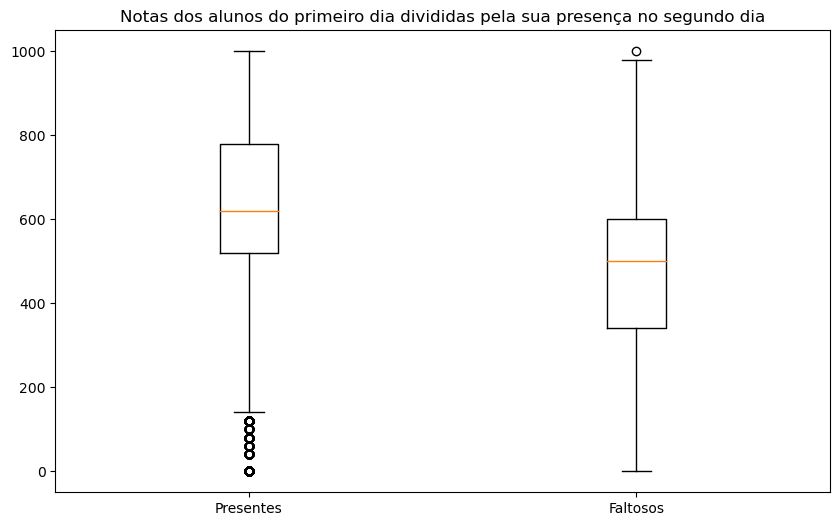

In [17]:
# Plotando o BoxPlot

plt.figure(figsize=(10,6))
plt.title('Notas dos alunos do primeiro dia divididas pela sua presença no segundo dia')
plt.boxplot([df_presente_dia_2['NU_NOTA_REDACAO'], df_faltou_dia_2['NU_NOTA_REDACAO']], labels=['Presentes', 'Faltosos'])
plt.show()

Os intervalos de notas também estão semelhantes, no entanto a média de notas entre os alunos que estiveram presentes no segundo dia de prova é de 626, enquanto a dos que faltaram é de 453, isto é, bem inferior em relação ao grupo que realizou a segunda prova.

### Modelos de predição

Para realizar a predição foram escolhidos os modelos de Regressão Linear, Random Forest e Logistic Regression

#### Dividindo a base de dados em treino e teste

In [18]:
# Conferindo quais colunas possuem Nan
df.isna().sum()

Unnamed: 0                    0
NU_INSCRICAO                  0
TP_FAIXA_ETARIA               0
TP_SEXO                       0
TP_ESTADO_CIVIL               0
TP_COR_RACA                   0
TP_ESCOLA                     0
IN_TREINEIRO                  0
TP_PRESENCA_CN                0
TP_PRESENCA_CH                0
TP_PRESENCA_LC                0
TP_PRESENCA_MT                0
NU_NOTA_CN               144379
NU_NOTA_CH                    0
NU_NOTA_LC                    0
NU_NOTA_MT               144379
TP_STATUS_REDACAO             0
NU_NOTA_REDACAO               0
PRESENCA_PRIMEIRO_DIA         0
PRESENCA_SEGUNDO_DIA          0
dtype: int64

Somente as colunas 'NU_NOTA_CN' e 'NU_NOTA_MT' possuem Nan que correspondem aos candidatos ausentes no segundo dia de prova

In [42]:
# Passando as variáveis qualitativas para dummies
df_dummies = pd.get_dummies(df, columns=['TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_ESCOLA','IN_TREINEIRO','TP_STATUS_REDACAO', 'PRESENCA_SEGUNDO_DIA'])

df_dummies = df_dummies.drop(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'], axis=1)
#df_dummies.dtypes #= df_dummies.drop('Unnamed:0', axis=1)
df_dummies = df_dummies.drop(['Unnamed: 0','PRESENCA_PRIMEIRO_DIA'], axis=1)
df_dummies.dtypes


NU_INSCRICAO                                                 int64
NU_NOTA_CN                                                 float64
NU_NOTA_CH                                                 float64
NU_NOTA_LC                                                 float64
NU_NOTA_MT                                                 float64
NU_NOTA_REDACAO                                            float64
TP_FAIXA_ETARIA_17 anos                                      uint8
TP_FAIXA_ETARIA_18 anos                                      uint8
TP_FAIXA_ETARIA_19 anos                                      uint8
TP_FAIXA_ETARIA_20 anos                                      uint8
TP_FAIXA_ETARIA_21 anos                                      uint8
TP_FAIXA_ETARIA_22 anos                                      uint8
TP_FAIXA_ETARIA_23 anos                                      uint8
TP_FAIXA_ETARIA_24 anos                                      uint8
TP_FAIXA_ETARIA_25 anos                                      u

In [58]:
# Separando a base de dados em treino e teste
X = df_dummies.drop(['PRESENCA_SEGUNDO_DIA_Faltou','PRESENCA_SEGUNDO_DIA_Presente', 'NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_CN'], axis=1).values
y = df_dummies['PRESENCA_SEGUNDO_DIA_Presente'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

#### Regressão Logística

In [61]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [63]:
# Acurárcia
acuracia_lr = accuracy_score(y_test, lr_yhat)
print(acuracia_lr)

0.9499079586373627


In [71]:
# F1 score
f1score_lr = f1_score(y_test, lr_yhat)
print(f1score_lr)

0.9742969995229951


In [77]:
confusion_matrix(y_test, lr_yhat, labels = [0,1])

array([[   363,  35160],
       [   188, 669950]], dtype=int64)

#### Random Forest

In [69]:
rf = RandomForestClassifier(6)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [70]:
acuraracia_rf = accuracy_score(y_test, rf_yhat)
print(acuraracia_rf)

0.9350438808436345


In [72]:
f1score_rf = f1_score(y_test, rf_yhat)
print(f1score_rf)

0.9663112110016088


In [75]:
confusion_matrix(y_test, rf_yhat, labels = [0,1])

array([[  2442,  33081],
       [ 12756, 657382]], dtype=int64)